In [1]:
import torch
import matplotlib.pyplot as plt

from models import CVae


In [2]:
model_weight_path = "/data/CVae/Weight/vae_epoch_dim20_20.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = CVae(in_channels=1, num_classes=10, embed_dim=10, latent_dim=20).to(device)
vae.load_state_dict(torch.load(model_weight_path, weights_only=True))

<All keys matched successfully>

tensor([[-0.0819,  0.6112,  0.8542,  0.2032,  0.9629, -0.8633, -0.4332, -1.0578,
         -0.4973, -1.6474, -0.3672,  0.1214, -0.7277, -1.0039, -0.3563,  0.1645,
         -0.3311, -1.6908,  0.1201,  0.4539]], device='cuda:0')


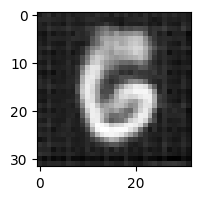

In [3]:
# 随机采样 生成图
image_latent = torch.randn((1, 20)).to(device)
print(image_latent)
image_tensor = vae.decode(image_latent, torch.tensor([6]).to(device))
image_data = image_tensor.squeeze(0).cpu().detach().numpy().reshape(32, 32)
plt.figure(figsize=(2, 2))
plt.imshow(image_data, cmap='gray')